In [18]:
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import plumed
import nglview
from ase.optimize.sciopt import *               
from ase.utils.geometry import *
from ase.lattice.spacegroup import crystal
from ase.visualize import *
from ase.lattice.surface import surface
from ase import Atoms
from ase import io
from ase.io import *
from ase.io.cif import read_cif
from ase.io.vasp import write_vasp
from abtem.visualize import show_atoms
from ase.visualize.plot import plot_atoms
from ase.build import add_adsorbate
from ase.io.proteindatabank import read_proteindatabank, write_proteindatabank
from ase.io.lammpsdata import write_lammps_data

! rm *.vasp

### image is taken from:  CsSnI3: Semiconductor or Metal? High Electrical Conductivity and Strong Near-Infrared Photoluminescence from a Single Material. High Hole Mobility and Phase-Transitions: 10.1021/ja301539s

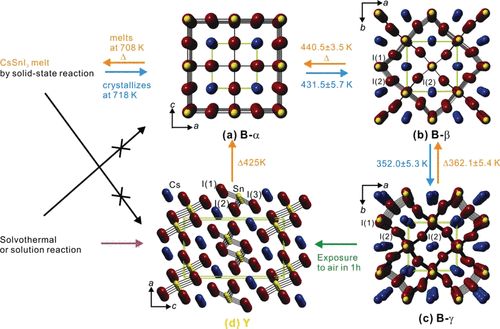

## cubic 3C polymorph: 10.1021/ja301539s
- Experimental data at 500K
   - ICSD 262925
   - ICSD Structure :  Cs I3 Sn
   - Space Group: P m 3 m (221)
   - Cell: a 6.2057Å b 6.2057Å c 6.2057Å, α 90° β 90° γ 90°

Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[12.4114, 6.2057, 12.4114], spacegroup_kinds=...)

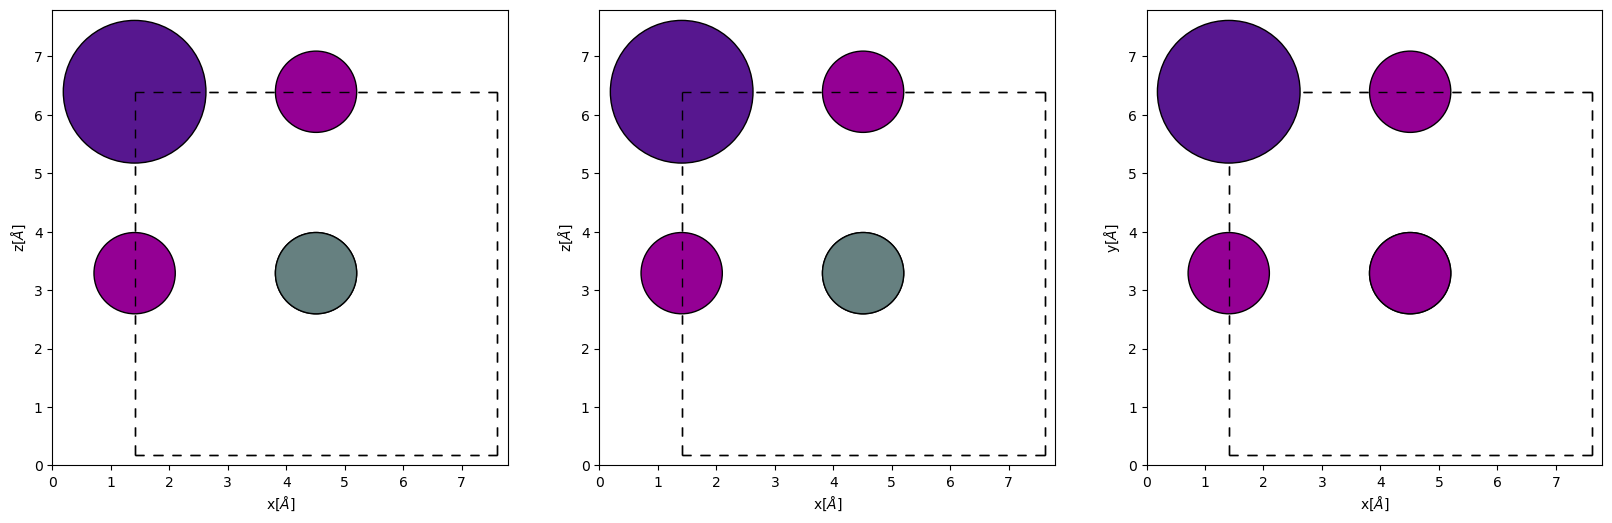

In [10]:
structure = io.read('cubic.cif')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")


supercell = structure.repeat((2,1,2))
supercell = sort(supercell)
write_vasp('cubic212.vasp', supercell, vasp5=True, direct=True)

supercell


## tetragonal polymorph:   http://dx.doi.org/10.1021/ja301539s
- Experimental data at 380K
  - ICSD 262925
  - Space Group: P 4/m b m (127)
  - Cell: a 8.7182Å b 8.7182Å c 6.1908Å, α 90° β 90° γ 90°

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(127, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[8.7182, 8.7182, 12.3816], spacegroup_kinds=...)

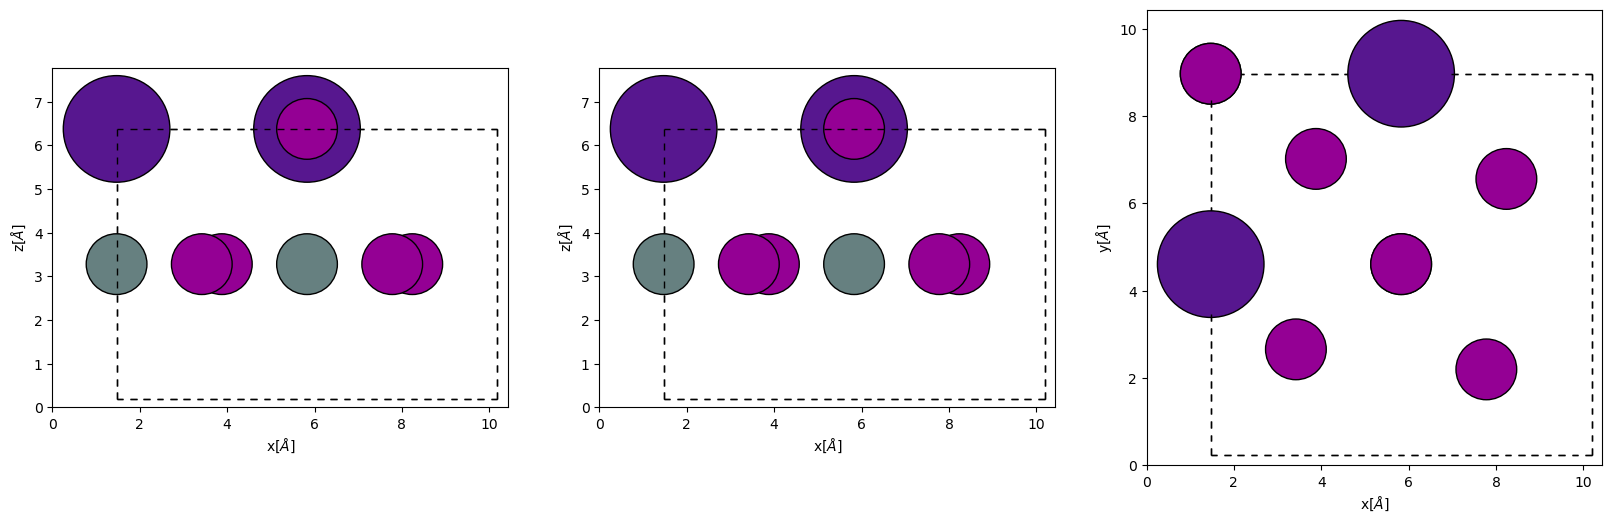

In [3]:
structure = io.read('beta.cif')

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = structure.repeat((1,1,2))
supercell = sort(supercell)
write_vasp('beta112.vasp', supercell, vasp5=True, direct=True)

supercell


## orthorhombic polymorph: http://dx.doi.org/10.1021/ja301539s
- Experimental data at 300K
  - ICSD 262926
  - ICSD Structure : (Cs I3 Pb)n
  - Space Group:  P n m a (62)
  - Cell: a 8.6885Å b 12.3775Å c 8.6384Å, α 90° β 90° γ 90°

/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[8.6885, 12.3775, 8.6384], spacegroup_kinds=...)

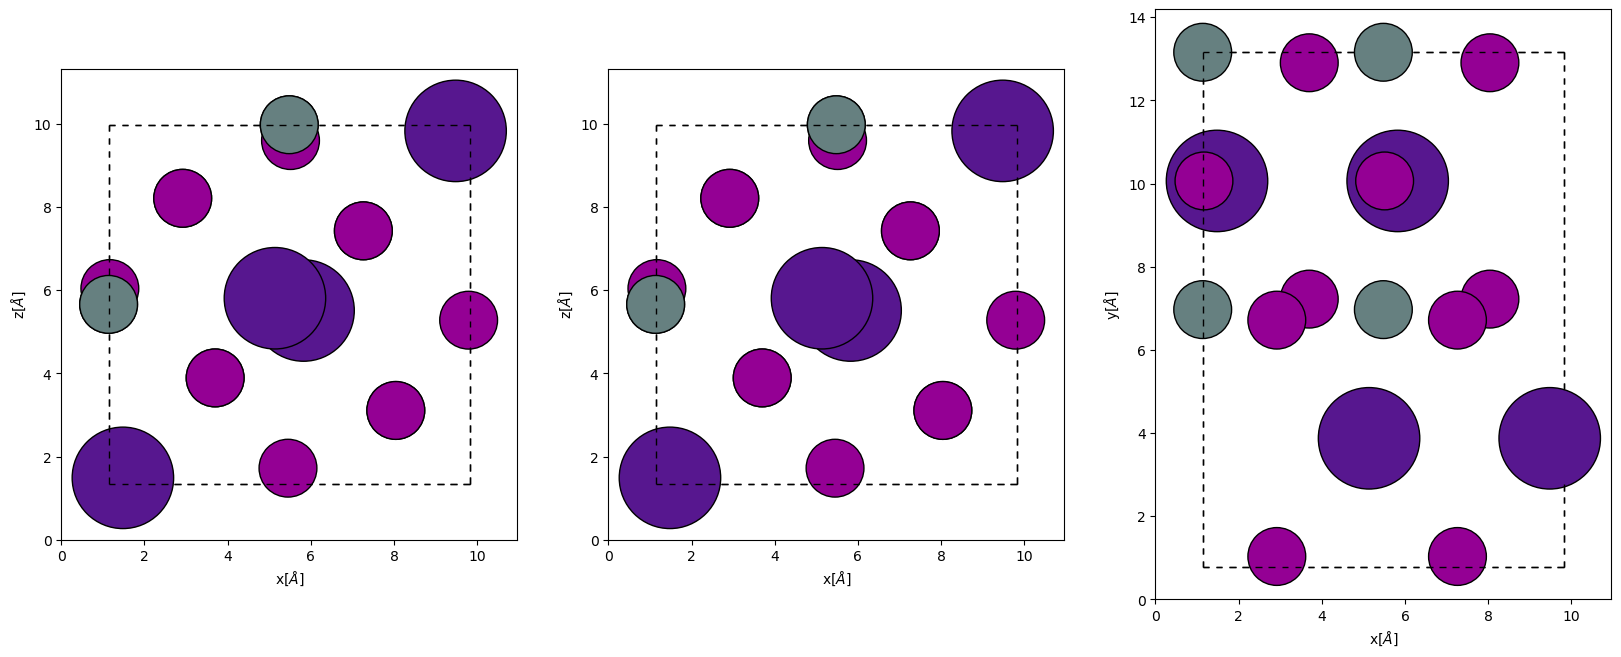

In [19]:
structure = io.read('gamma.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = sort(structure)
write_vasp('gamma.vasp', supercell, vasp5=True, direct=True)
write_proteindatabank('gamma.pdb', supercell)

supercell


## hexagonal polymorph: http://dx.doi.org/10.1021/ja301539s
- Experimental data at 300K
  - ICSD 262927 
  - Space group:  P n m a (62)	
  - cell: a 10.3495Å b 4.7632Å c 17.684Å, α 90° β 90° γ 90° 			
  - Polymorph: delta polymorph
  - Colour: yellow


/home/ahlawat/.local/lib/python3.9/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(


Atoms(symbols='Cs4I12Sn4', pbc=True, cell=[10.3495, 4.7632, 17.684], spacegroup_kinds=...)

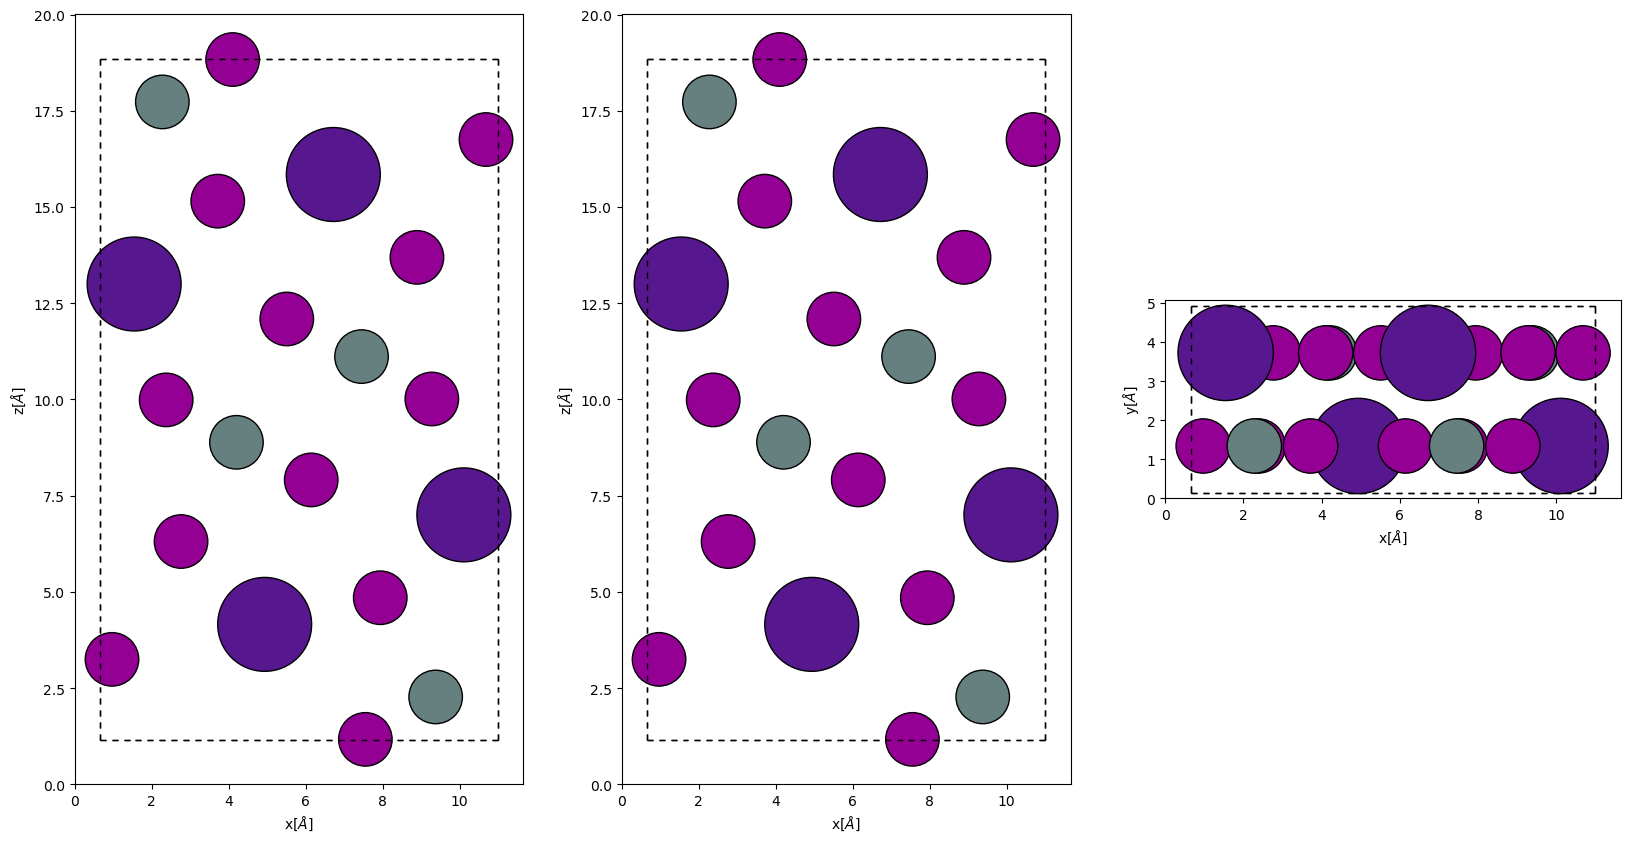

In [4]:
structure = io.read('delta.cif')
structure = sort(structure)

view(structure)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

plot_atoms(structure, ax1, radii=0.5, rotation=('90x,0y,0z'))
#ax1.set_xlim(-20, 30)
ax1.set_xlabel(r'x[$\AA$]')
ax1.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax2, radii=0.5, rotation=('90x,0y,0z'))
#ax2.set_xlim(-20, 30)
ax2.set_xlabel(r'x[$\AA$]')
ax2.set_ylabel(r'z[$\AA$]')

plot_atoms(structure, ax3, radii=0.5, rotation=('180x,0y,0z'))
#ax3.set_xlim(-20, 30)
ax3.set_xlabel(r'x[$\AA$]')
ax3.set_ylabel(r'y[$\AA$]')

#fig.savefig("ase_slab.png")

supercell = sort(structure)
write_vasp('delta.vasp', supercell, vasp5=True, direct=True)

supercell


# Benchmark results

In [3]:
# name = ['LDA', 'PBE', 'PBESOL', 'PBESOL+rVV10', 'r2SCAN', 'r2SCAN_RVV10', 'PBE_D3', 'optB86b', 'HSE', 'vdw-DF2']

# final_gamma_delta = []

# fig, (ax) = plt.subplots(figsize=(8,4))

# ax.bar(name,final_gamma_delta, color='purple', width = 0.25, alpha=0.8)

# plt.axhline(y = -14.4, color = 'r', linestyle = '--', lw=2, label='experiment')

# plt.axhline(y = ()*96.491566/4, color = 'b', linestyle = '--', lw=2, label='RPA@HF')

# ax.set_ylabel('$\Delta E_{\delta-\gamma}$ (KJ/mol/f.u.)', fontsize = 12)
# ax.set_title('Relative energy between hexagonal and orthorhombic phases', fontsize=10)
# ax.tick_params(labelsize=9)

# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.2))

# plt.savefig('relative_energy_delta_ortho.png')